In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **EJERCICIOS**

## **1. Responde las siguientes preguntas:**
### ° **¿Define Base de Datos y Base de Datos Relacional?**

 Una base de datos es una colección de una gran cantidad de datos que pueden contener estructuras relacionales o no relacionales, ademas, pueden ser consultados facilmente por medio de instrucciones.
 
 Una base de datos relacional es un tipo de base de datos donde se presenta una clara estructura de tipo tabla, se accesa a cada elemento por medio de un índice y permite la dependencia de datos entre las tablas.
### ° **¿Cuál es la importancia de SQL en un pipeline de datos genérico?**

**Pipeline --> Flujo de datos**

 Un pipeline de datos permite mover y utilizar la información a conveniencia, la importancia que da SQL es la de almacenar una gran cantidad de datos y permitir el facil acceso a cada uno de los datos que contiene para un posterior procesamiento de los datos.

### ° **¿Qué es un RDBMS?**

 Sistema de gestion de bases de datos relacionales, permite interactuar con una base de datos relacional, agregando caracteristicas especificas propias del RDBMS que se este utilizando


_________________________________________________________________________________
## **2. Busca en internet el archivo .sql para crear la base de datos con SQLite3 llamada Chinook**
LISTO

_______________________________________________________________________________
## **3. Busca el diagrama entidad-relación de la base de datos Chinook.**

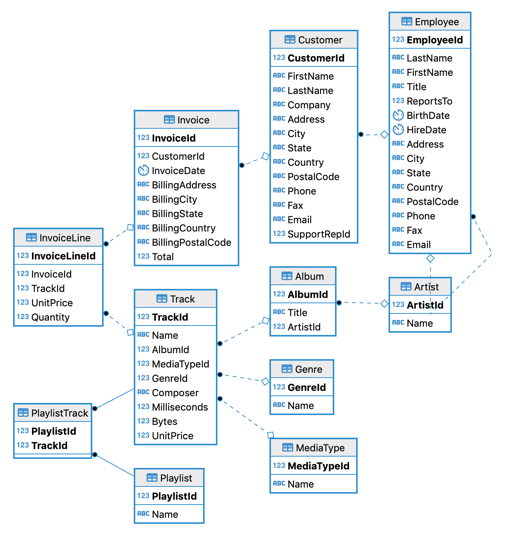


_______________________________________________________________________________

## **4. Responde: ¿Cuántas tablas hay y cuáles son sus nombres?**
1._ Employee

2._ Customer

3._ Invoice

4._ Invoice Line

5._ Track

6._ Playlist Track

7._ Playlist

8._ Album

9._ Genre

10._ Artist

11._ MediaType

In [2]:
# Copiar la base de datos chinook en la seccion izquierda, en el apartado de la carpeta
import sqlite3

conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Ejecutar un script de SQL para crear la base de datos de la imagen de arriba. La BD chinook
sql_file = open("/content/drive/MyDrive/Colab Notebooks/Curso_Alan/Módulo 0/M0S4_Ejercicio_SQL/Chinook.sql",encoding='latin-1')
sql_as_string = sql_file.read()
cursor.executescript(sql_as_string)

In [3]:
# Query para saber el nombre de las tablas que se incluyen en la Base de Datos
query = ''' SELECT name
FROM sqlite_master
WHERE type = 'table'
ORDER BY NAME
'''

cursor.execute(query)
res = cursor.fetchall()
print('Las tablas son: ', res)

Las tablas son:  [('Album',), ('Artist',), ('Customer',), ('Employee',), ('Genre',), ('Invoice',), ('InvoiceLine',), ('MediaType',), ('Playlist',), ('PlaylistTrack',), ('Track',)]


_________________________________________________________________________________________________

## **5. Crea dataframes con los datos de las tablas tracks, customers y employees. Un dataframe por tabla.**


In [4]:
# Importo pandas que me permite convertir a un dataframe y da una mejor presentacion
import pandas as pd

# DATAFRAME PARA TRACKS

# Selecciono todas las columnas
query_1 = '''SELECT *    
FROM Track;'''

tabla_track = cursor.execute(query_1).fetchall()
columnas_track = cursor.execute('PRAGMA table_info("Track")').fetchall()
df_Tracks = pd.DataFrame(tabla_track, columns=[i[1] for i in columnas_track])

df_Tracks.head(10)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99


In [5]:
# DATAFRAME PARA CUSTOMER

# Selecciono todas las columnas
query_2 = '''SELECT *    
FROM Customer;'''

tabla_customer = cursor.execute(query_2).fetchall()
columnas_customer = cursor.execute('PRAGMA table_info("Customer")').fetchall()
df_customer = pd.DataFrame(tabla_customer, columns=[i[1] for i in columnas_customer])

df_customer.head(10)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,LuÃ­s,GonÃ§alves,Embraer - Empresa Brasileira de AeronÃ¡utica S.A.,"Av. Brigadeiro Faria Lima, 2170",SÃ£o JosÃ© dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,KÃ¶hler,None,Theodor-Heuss-StraÃe 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,FranÃ§ois,Tremblay,None,1498 rue BÃ©langer,MontrÃ©al,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,BjÃ¸rn,Hansen,None,UllevÃ¥lsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,FrantiÅ¡ek,WichterlovÃ¡,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,HolÃ½,None,RilskÃ¡ 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"RotenturmstraÃe 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,GrÃ©trystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,SÃ¸nder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. FalcÃ£o Filho, 155",SÃ£o Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


In [6]:
# DATAFRAME PARA EMPLOYEE

# Selecciono todas las columnas
query_3 = '''SELECT *    
FROM Employee;'''

tabla_employee = cursor.execute(query_3).fetchall()
columnas_employee = cursor.execute('PRAGMA table_info("Employee")').fetchall()
df_employee = pd.DataFrame(tabla_employee, columns=[i[1] for i in columnas_employee])

df_employee.head(10)

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


______________________________________________________________________________
## **6. Ejecuta las *queries* necesarias para responder las siguientes preguntas:**

### **- ¿Cuál es la ciudad que tiene más clientes?**



In [7]:
query_4 = ''' SELECT city, count (city) as total
FROM Customer
GROUP BY CITY 
ORDER BY 2 desc
'''

cursor.execute(query_4)
res = cursor.fetchall()
print('Ciudades con mas clientes: ', res[0:6])

Ciudades con mas clientes:  [('Berlin', 2), ('London', 2), ('Mountain View', 2), ('Paris', 2), ('Prague', 2), ('SÃ£o Paulo', 2)]


### **- ¿Cuál es el promedio de las edades de los empleados al ser contratados?**


In [ ]:
# DUDA DUDA DUDA DUDA DUDA DUDA DUDA DUDA DUDA DUDA
query_5 = ''' SELECT BirthDate, HireDate
FROM Employee 
'''

cursor.execute(query_5)
res = cursor.fetchall()
a = int(res[0])
print(a)

TypeError: ignored

### **- ¿Cuál es el genero más frecuente?**


In [8]:
query_6 = '''SELECT GenreID, count (GenreID) as total    
FROM Track
GROUP by GenreID
ORDER BY 2 desc
'''
query_7 = '''SELECT Name 
FROM GENRE'''

cursor.execute(query_6)
res = cursor.fetchall()

cursor.execute(query_7)
res1 = cursor.fetchall()

print('El genero mas frecuente es ', res1[0], 'con', res[0][1], 'apariciones')

El genero mas frecuente es  ('Rock',) con 1297 apariciones


### **- ¿Cuál es el nombre de la canción más larga? ¿la más corta?**



In [9]:
query_8 = '''SELECT Name, max(Milliseconds)   
FROM Track
'''
cursor.execute(query_8)
res = cursor.fetchall()

query_9 = '''SELECT Name, min(Milliseconds)   
FROM Track
'''
cursor.execute(query_9)
res1 = cursor.fetchall()


print('Cancion mas larga es: ', res[0][0])
print('Cancion mas corta es: ', res1[0][0])

Cancion mas larga es:  Occupation / Precipice
Cancion mas corta es:  Ã Uma Partida De Futebol


### **- ¿Quién es el compositor que más canciones tiene (en esta BD)?**

In [10]:
query_10 = '''SELECT Composer, count (Composer) as total 
FROM Track
GROUP by Composer
ORDER BY 2 desc
'''
cursor.execute(query_10)
res = cursor.fetchall()

print('El compositor con mas canciones es: ', res[0][0])

El compositor con mas canciones es:  Steve Harris
